In [26]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import random

In [35]:
cartella = r'../file/Data_Challenge_PHM2023_training_data/Pitting_degradation_level_0 (Healthy)'
#dentro deve prende e apri tutti i file, controllare il nome e a seconda di questo fare delle azioni e salvare su un altro file
# Inizializza un DataFrame vuoto per salvare i risultati
risultati = pd.DataFrame(columns=['acc_X', 'acc_Y', 'acc_Z', "tachimetro"])
codici_6sec = ["V300_", "V400_", "V500_", "V600_", "V700_", "V800_", "V900_", "V1000_"]

# Loop attraverso tutti i file nella cartella
for filename in os.listdir(cartella):
    # Costruisci il percorso completo del file
    percorso_file = os.path.join(cartella, filename)
    df = pd.read_csv(percorso_file, delim_whitespace=True, header=None)
    #tachimetro indica 1 quando albero di carico fa un giro
    nuovi_nomi_colonne = ['acc_X', 'acc_Y', 'acc_Z', "tachimetro"]
    df.columns = nuovi_nomi_colonne
    
    # Esegui azioni basate sul nome del file
    if "V100_" in filename or "V200_" in filename:
        # Esegui azioni specifiche per la condizione 1
        risultati = df[150000:210000]
    elif any(codice in filename for codice in codici_6sec):
        # Esegui azioni specifiche per la condizione 2
        risultati = df[40000:100000]
    else:
        # Esegui azioni predefinite per gli altri casi
        risultati = df[:60000]

    # Salva il DataFrame con i risultati su un nuovo file
    risultati.to_csv(f'../file_cut_training/Pitting_degradation_level_0 (Healthy)/{filename[:-4]}_cut.csv', index=False)

In [9]:
cartella1 = r'../file_cut_training/Pitting_degradation_level_8'
cartella_hold = r'../hold_out_test/Pitting_degradation_level_8'

velocita = ["100", "200", "300", "400", "500", "600", "700", "800", "900", "1000", "1200", "2100", "2700", "3000", "3600"]
coppia = ["50", "100", "200", "300", "400", "500"]

fattore_replicazione_max = 5

for v in velocita:
    for c in coppia:
        num_files = 0  # Contatore per i file trovati
        
        for current_replica in range(1, fattore_replicazione_max + 1):
            # Costruisci il nome del file
            nome_file_originale = f"V{v}_{c}N_{current_replica}_cut.csv"
            
            # Costruisci il percorso completo del file originale
            percorso_file_originale = os.path.join(cartella1, nome_file_originale)
            
            # Verifica se il file esiste
            if os.path.exists(percorso_file_originale):
                num_files += 1
        
        # Se c'è un solo file per la combinazione coppia-velocità, esegui un'operazione di copia
        if num_files == 1:
            for current_replica in range(1, fattore_replicazione_max + 1):
                nome_file_originale = f"V{v}_{c}N_{current_replica}_cut.csv"
                percorso_file_originale = os.path.join(cartella1, nome_file_originale)
                nome_file_nuovo = f"V{v}_{c}N_{current_replica}_cut.csv"
                percorso_file_nuovo = os.path.join(cartella_hold, nome_file_nuovo)
                
                if os.path.exists(percorso_file_originale):
                    shutil.copy(percorso_file_originale, percorso_file_nuovo)
                    print(f"File {nome_file_originale} copiato in {cartella_hold}")
                    break
        else:
            for current_replica in range(1, fattore_replicazione_max + 1):
                nome_file_originale = f"V{v}_{c}N_{current_replica}_cut.csv"
                percorso_file_originale = os.path.join(cartella1, nome_file_originale)
                nome_file_nuovo = f"V{v}_{c}N_{current_replica}_cut.csv"
                percorso_file_nuovo = os.path.join(cartella_hold, nome_file_nuovo)
                
                if os.path.exists(percorso_file_originale):
                    shutil.move(percorso_file_originale, percorso_file_nuovo)
                    print(f"File {nome_file_originale} spostato in {cartella_hold}")
                    break

File V100_50N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V100_100N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V100_200N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V100_300N_2_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V100_400N_4_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V100_500N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_50N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_100N_2_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_200N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_300N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_400N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V200_500N_1_cut.csv spostato in ../hold_out_test/Pitting_degradation_level_8
File V300_50N_1_cu

In [36]:
txt_file_path = r'../file/Data_Challenge_PHM2023_training_data/Pitting_degradation_level_0 (Healthy)/V400_50N_1.txt'

#Utilizza il separatore di default, che è lo spazio (' ') e non considerare la prima riga come nome colonne
df = pd.read_csv(txt_file_path, delim_whitespace=True, header=None)
#tachimetro indica 1 quando albero di carico fa un giro
nuovi_nomi_colonne = ['acc_X', 'acc_Y', 'acc_Z', "tachimetro"]
df.columns = nuovi_nomi_colonne

print(df)
print(df["tachimetro"].max())
print(df.where(df["tachimetro"] == 1.0).count())
result_df = df[df["tachimetro"] == 1.0]
print(result_df)


           acc_X     acc_Y     acc_Z  tachimetro
0      -0.239551 -0.064390 -0.224016         0.0
1      -0.071208  0.138668  0.037597         0.0
2      -0.108176  0.073336 -0.030849         0.0
3      -0.031758  0.066038  0.090378         0.0
4      -0.034984  0.037904  0.046273         0.0
...          ...       ...       ...         ...
123899 -0.076046 -0.018481  0.169067         0.0
123900 -0.121946 -0.193876 -0.034585         0.0
123901 -0.058926 -0.251792 -0.135567         0.0
123902  0.097880 -0.176572 -0.011448         0.0
123903  0.100733 -0.152558 -0.102067         0.0

[123904 rows x 4 columns]
1.0
acc_X         22
acc_Y         22
acc_Z         22
tachimetro    22
dtype: int64
           acc_X     acc_Y     acc_Z  tachimetro
4703   -0.079767 -0.086167 -0.011930         1.0
10236   0.074805 -0.016598  0.131108         1.0
15772  -0.136585 -0.005179  0.046755         1.0
21302  -0.001985  0.054737  0.029162         1.0
26833  -0.111526 -0.174924 -0.150750         1.0
32370 

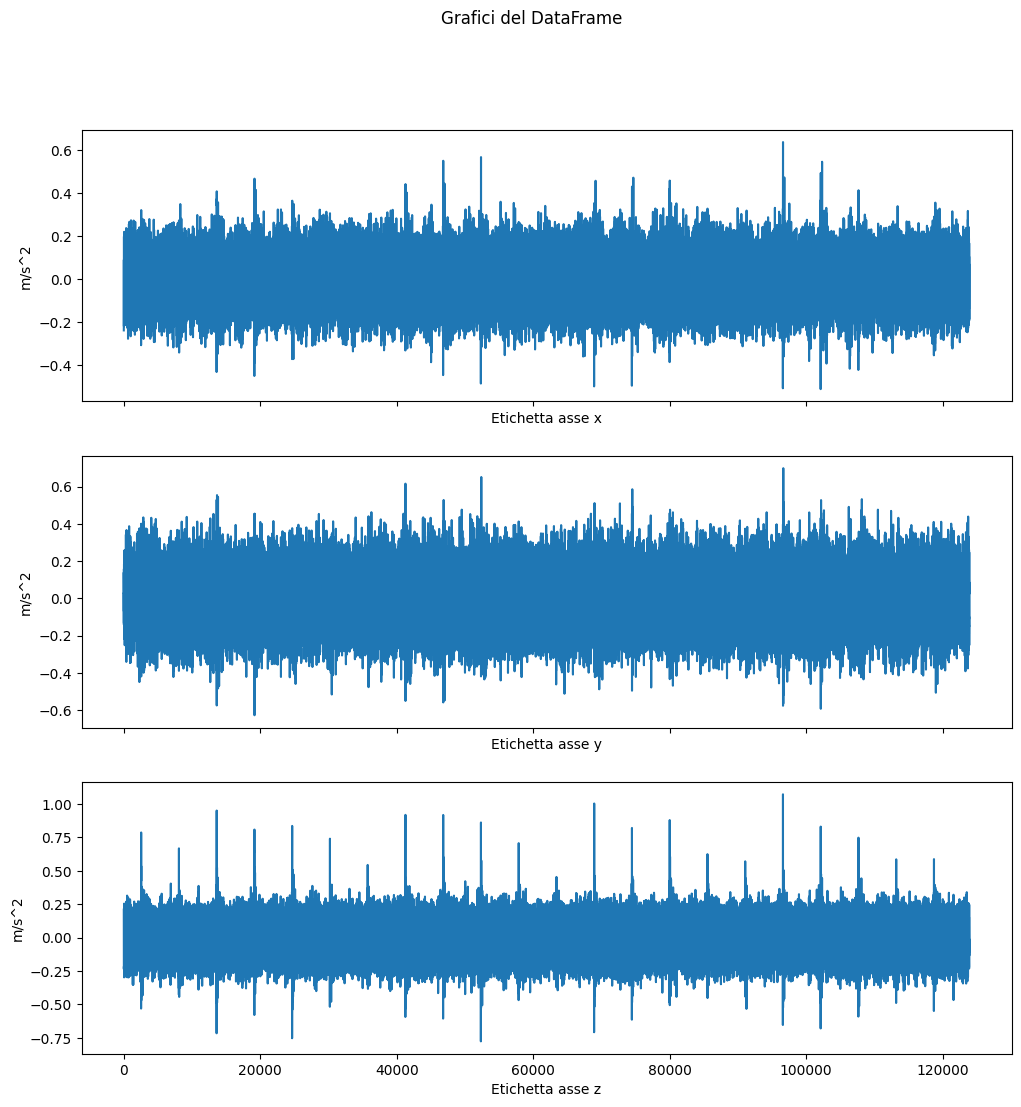

In [37]:
# Creare i sottografici
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 12))

# Tracciare i dati su ciascun sottografo
ax[0].plot(df['acc_X'])
ax[1].plot(df['acc_Y'])
ax[2].plot(df['acc_Z'])

# Aggiungere etichette e titoli
ax[0].set_xlabel('Etichetta asse x')
ax[1].set_xlabel('Etichetta asse y')
ax[2].set_xlabel('Etichetta asse z')
ax[0].set_ylabel('m/s^2')
ax[1].set_ylabel('m/s^2')
ax[2].set_ylabel('m/s^2')
fig.suptitle('Grafici del DataFrame')

# Mostrare il grafico
plt.show()

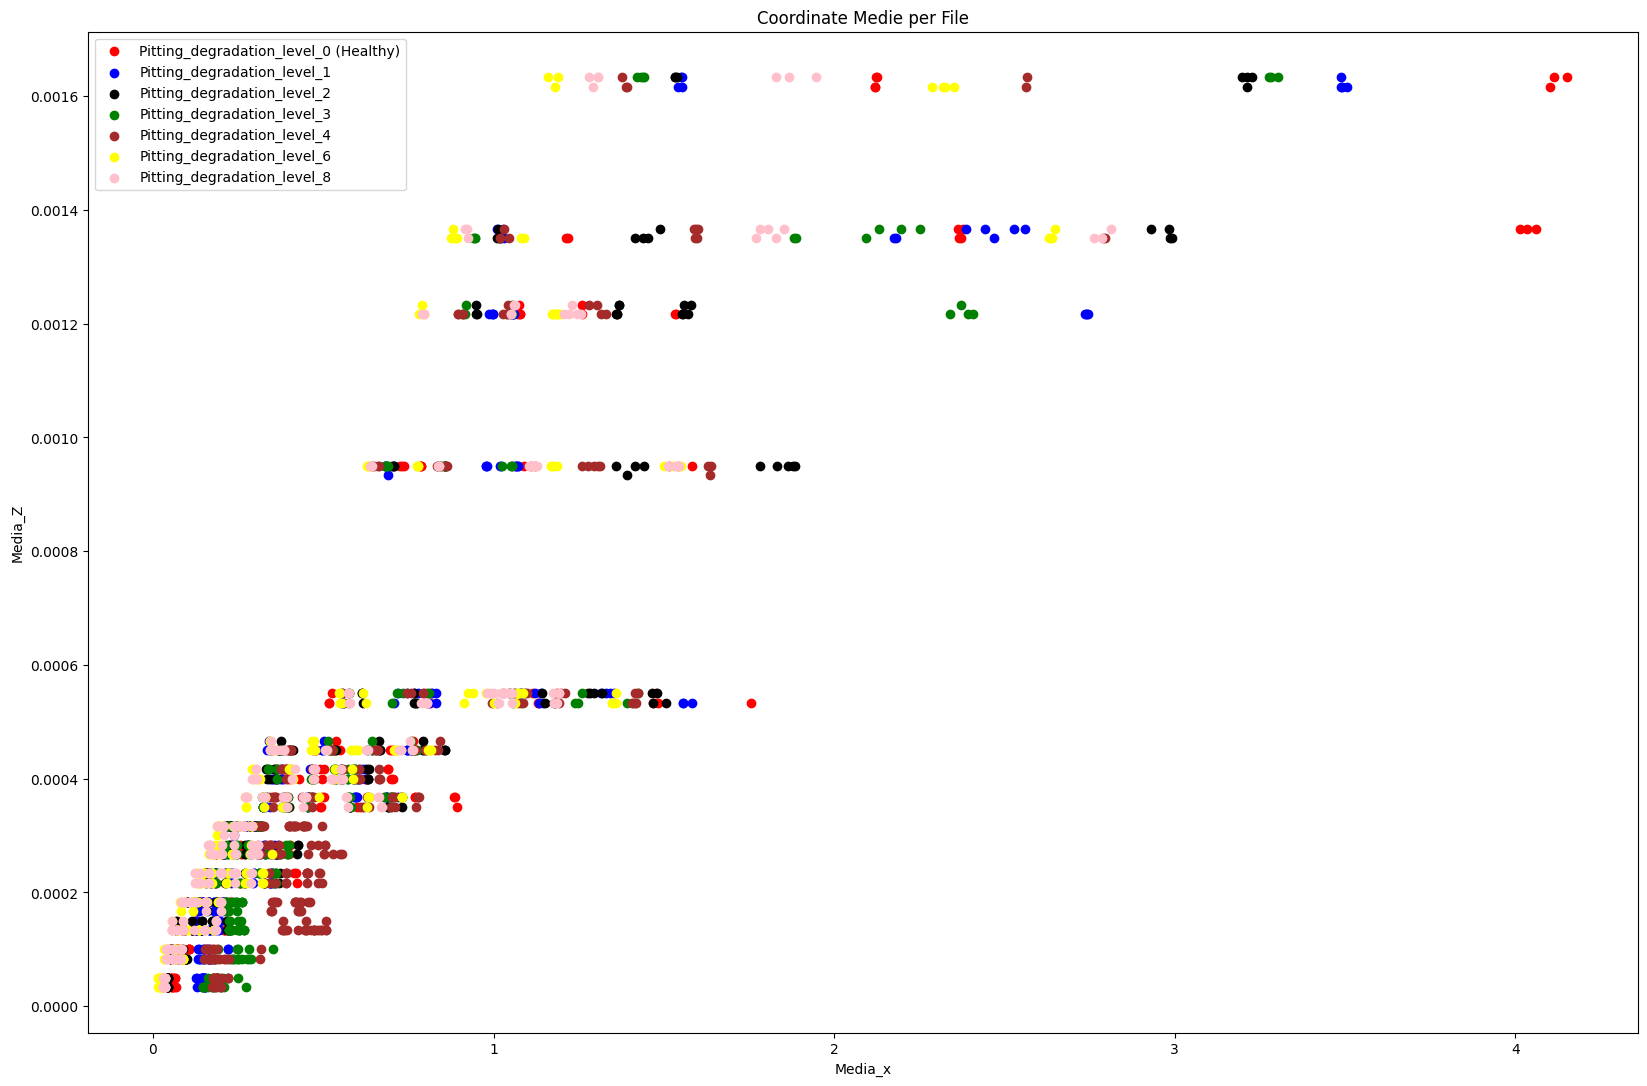

In [16]:
import numpy as np

cartella = r'../file_cut_training'

medie_x = []
medie_z = []
colori_sottocartelle = ['red', 'blue', 'black', 'green', 'brown', 'yellow', 'pink']

plt.figure(figsize=(20, 13))

for i, directory in enumerate(os.listdir(cartella)):
    percorso_sottocartella = os.path.join(cartella, directory)
    
    medie_x = []
    medie_z = []

    for filename in os.listdir(percorso_sottocartella):
        percorso_file = os.path.join(percorso_sottocartella, filename)

        #Legg file CSV salta prima riga
        df_file = pd.read_csv(percorso_file, names=['x', 'y', 'z'], skiprows=1)
        
        media_x_file = df_file['x'].abs().mean()
        media_z_file = df_file['z'].abs().mean()

        medie_x.append(media_x_file)
        medie_z.append(media_z_file)

    colore_sottocartella = colori_sottocartelle[i]
    plt.scatter(medie_x, medie_z, color=colore_sottocartella)

plt.xlabel('Media_x')
plt.ylabel('Media_Z')
plt.title('Coordinate Medie per File')
legend_labels = [os.path.basename(d) for d in os.listdir(cartella)]
plt.legend(legend_labels)
plt.show()


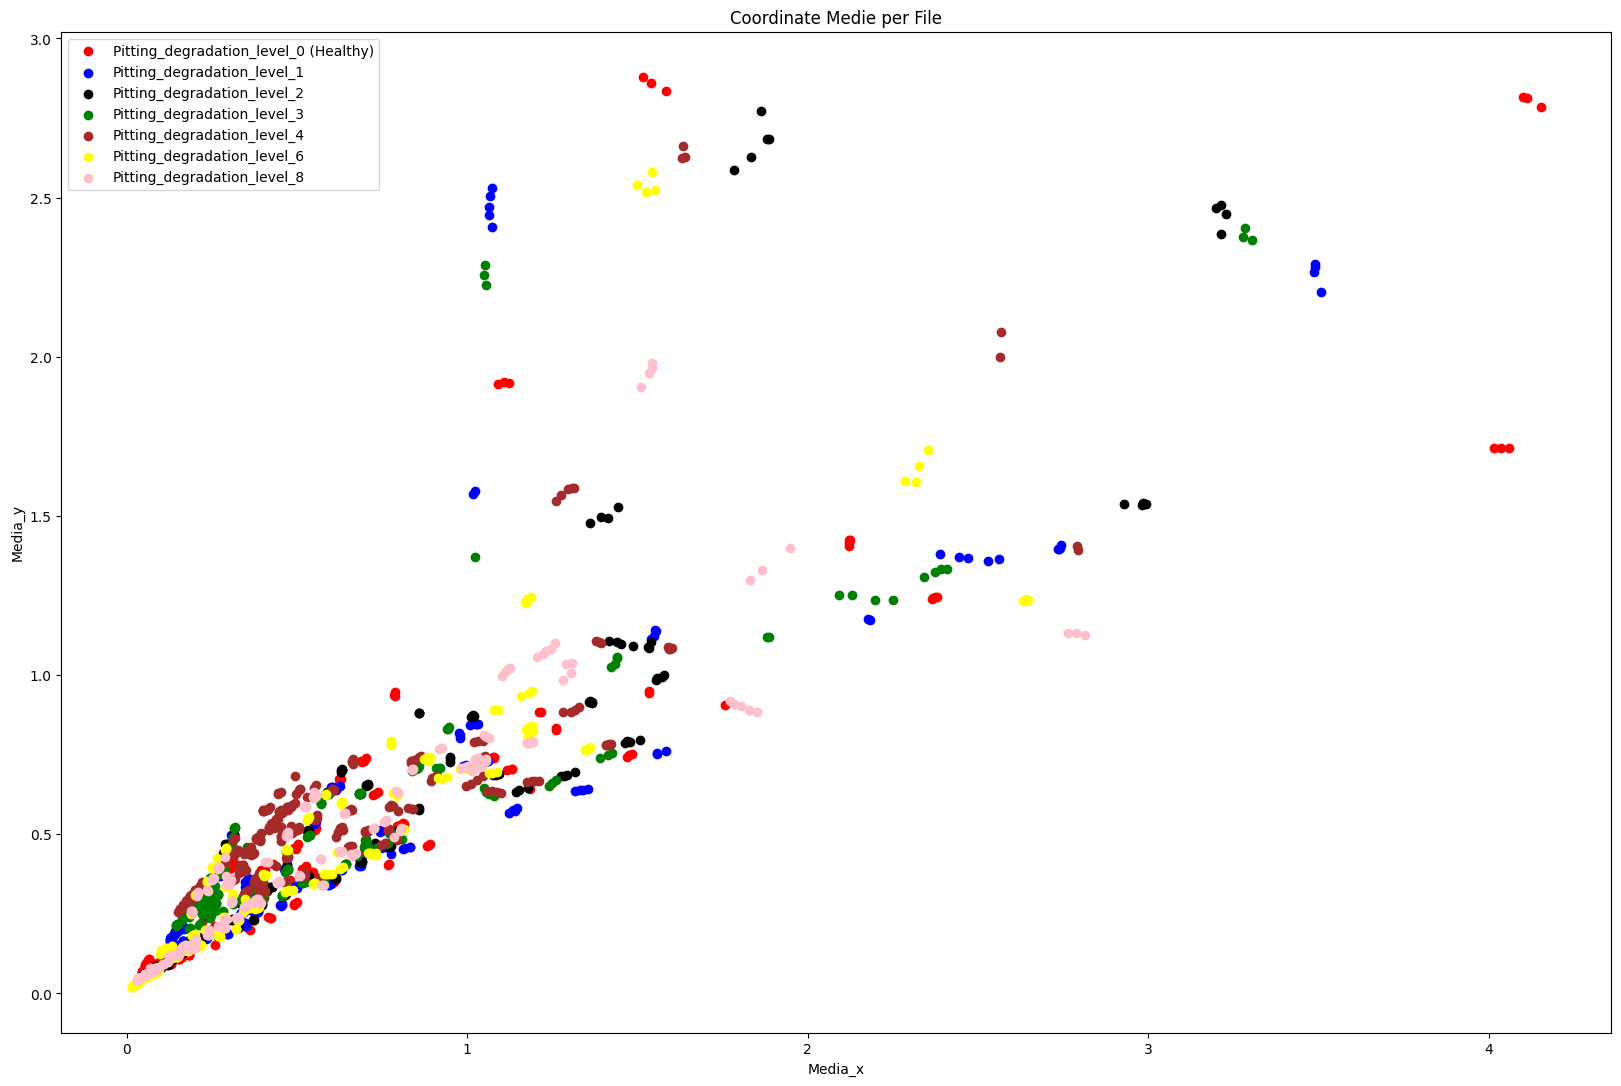

In [17]:
import numpy as np

cartella = r'../file_cut_training'

medie_x = []
medie_z = []
colori_sottocartelle = ['red', 'blue', 'black', 'green', 'brown', 'yellow', 'pink']

plt.figure(figsize=(20, 13))

for i, directory in enumerate(os.listdir(cartella)):
    percorso_sottocartella = os.path.join(cartella, directory)
    
    medie_x = []
    medie_z = []

    for filename in os.listdir(percorso_sottocartella):
        percorso_file = os.path.join(percorso_sottocartella, filename)

        df_file = pd.read_csv(percorso_file, names=['x', 'y', 'z'], skiprows=1)
        
        media_x_file = df_file['x'].abs().mean()
        media_z_file = df_file['y'].abs().mean()

        medie_x.append(media_x_file)
        medie_z.append(media_z_file)

    colore_sottocartella = colori_sottocartelle[i]
    plt.scatter(medie_x, medie_z, color=colore_sottocartella)

plt.xlabel('Media_x')
plt.ylabel('Media_y')
plt.title('Coordinate Medie per File')

legend_labels = [os.path.basename(d) for d in os.listdir(cartella)]
plt.legend(legend_labels)

plt.show()


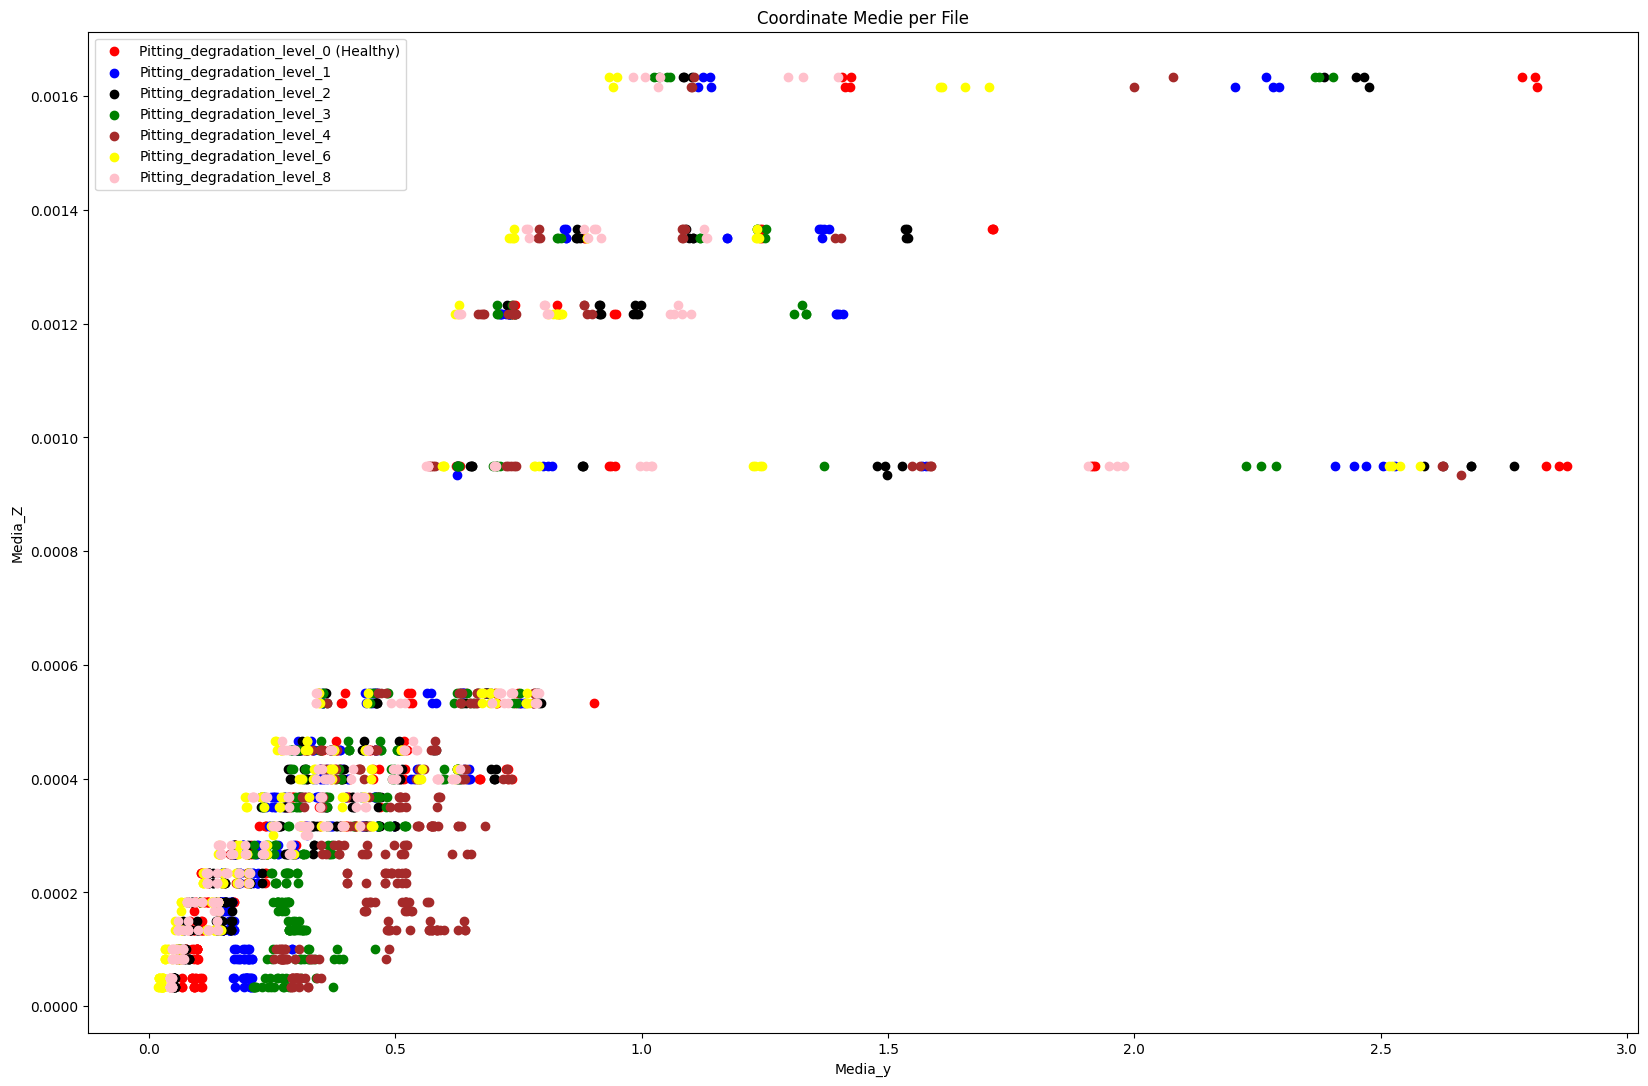

In [15]:
import numpy as np

cartella = r'../file_cut_training'

medie_x = []
medie_z = []
colori_sottocartelle = ['red', 'blue', 'black', 'green', 'brown', 'yellow', 'pink']

plt.figure(figsize=(20, 13))

for i, directory in enumerate(os.listdir(cartella)):
    percorso_sottocartella = os.path.join(cartella, directory)
    
    medie_x = []
    medie_z = []

    for filename in os.listdir(percorso_sottocartella):
        percorso_file = os.path.join(percorso_sottocartella, filename)

        df_file = pd.read_csv(percorso_file, names=['x', 'y', 'z'], skiprows=1)

        media_x_file = df_file['y'].abs().mean()
        media_z_file = df_file['z'].abs().mean()

        medie_x.append(media_x_file)
        medie_z.append(media_z_file)

    colore_sottocartella = colori_sottocartelle[i]

    plt.scatter(medie_x, medie_z, color=colore_sottocartella)

plt.xlabel('Media_y')
plt.ylabel('Media_Z')
plt.title('Coordinate Medie per File')
legend_labels = [os.path.basename(d) for d in os.listdir(cartella)]
plt.legend(legend_labels)
plt.show()


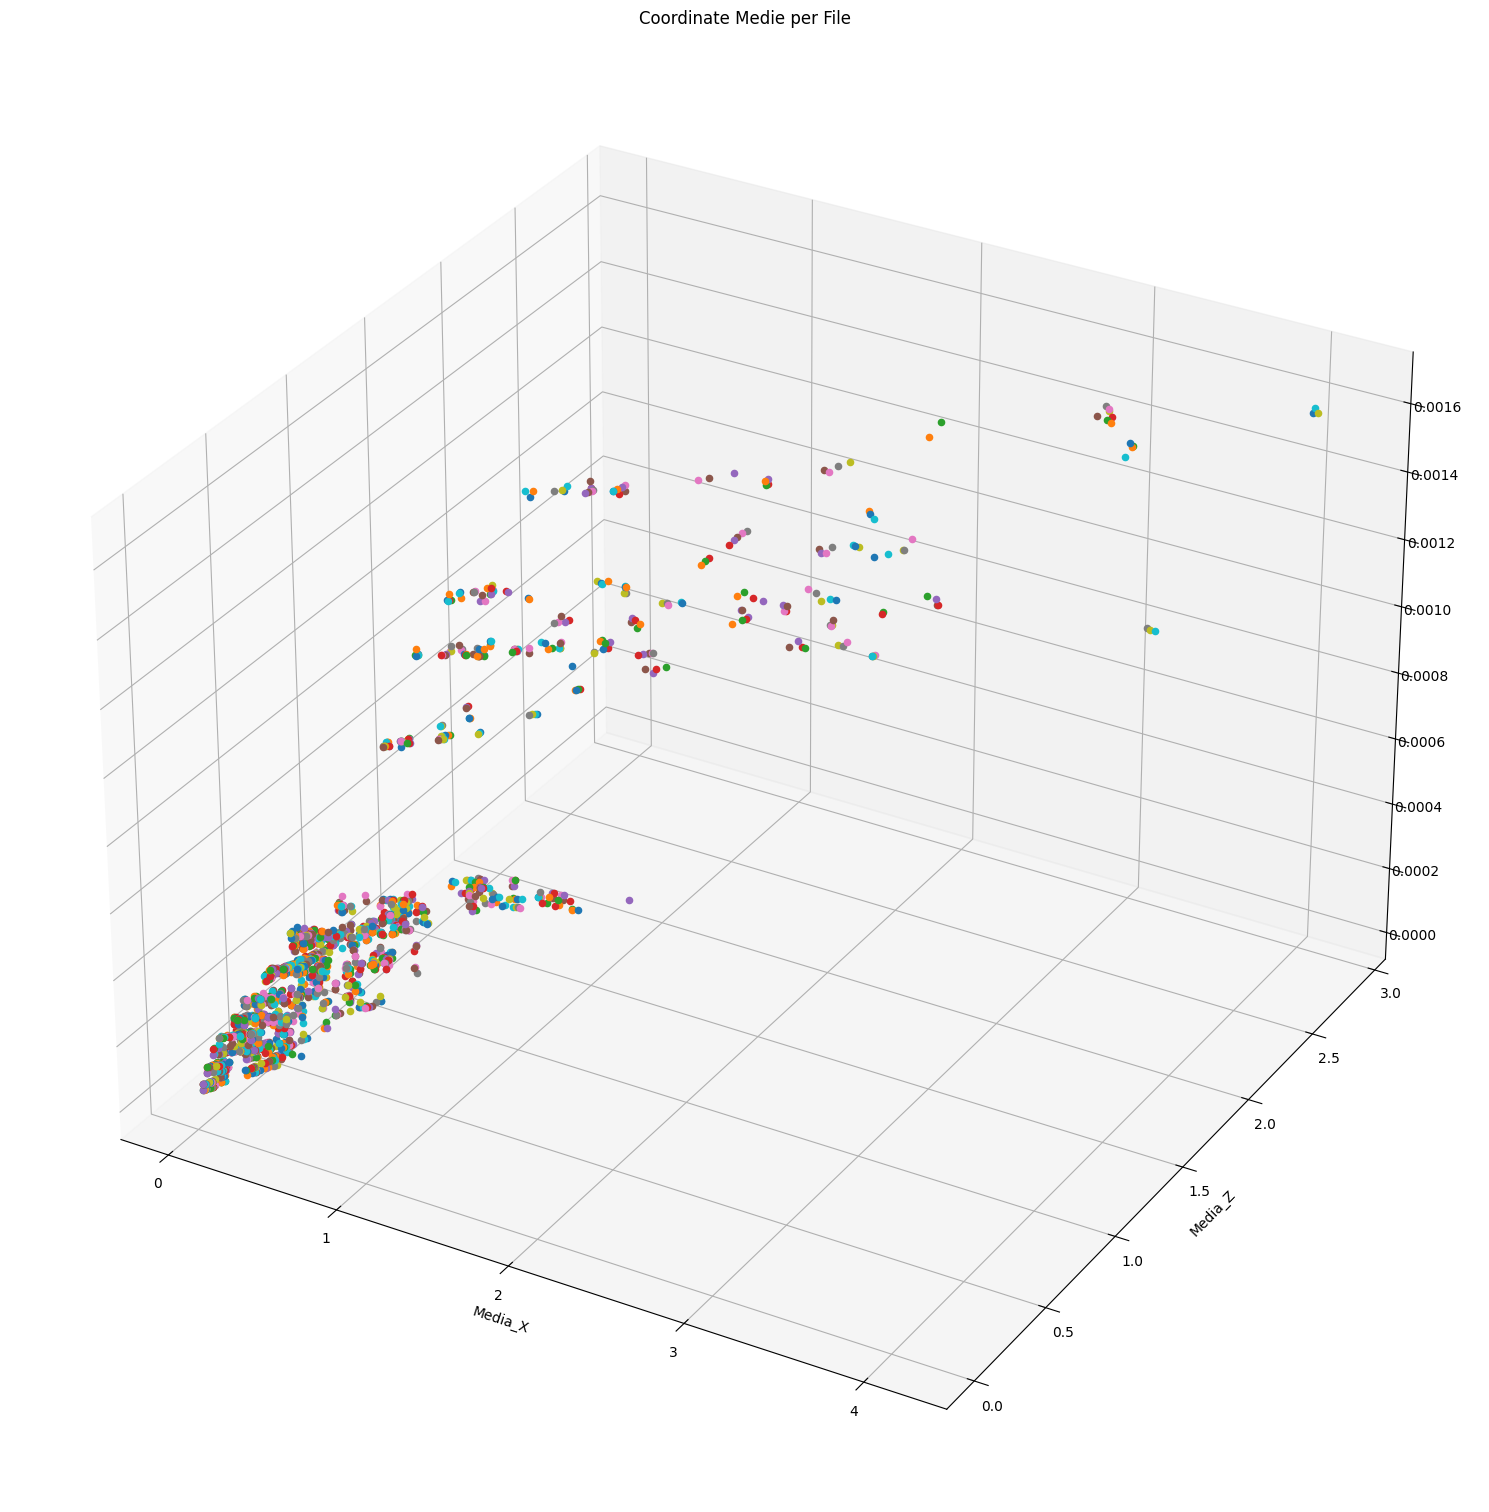

In [14]:
import numpy as np

cartella = r'../file_cut_training'

medie_x = []
medie_z = []
colori_sottocartelle = ['red', 'blue', 'black', 'green', 'brown', 'yellow', 'pink']

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

for i, directory in enumerate(os.listdir(cartella)):
    percorso_sottocartella = os.path.join(cartella, directory)
    for filename in os.listdir(percorso_sottocartella):
        percorso_file = os.path.join(percorso_sottocartella, filename)

        df_file = pd.read_csv(percorso_file, names=['x', 'y', 'z'], skiprows=1)
     
        media_x_file = df_file['x'].abs().mean()
        media_z_file = df_file['z'].abs().mean()
        media_y_file = df_file['y'].abs().mean()
        colore_sottocartella = colori_sottocartelle[i]
        
        ax.scatter3D(media_x_file, media_y_file, media_z_file, label = directory)

plt.xlabel('Media_X')
plt.ylabel('Media_Z')
plt.tight_layout()
plt.title('Coordinate Medie per File')
plt.show()
